In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 분석


In [2]:
df = pd.read_csv("../data/IEA-MethaneEmissionsComparison-World.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         1506 non-null   object 
 1   country        1484 non-null   object 
 2   emissions      1506 non-null   int64  
 3   source         1506 non-null   object 
 4   type           1506 non-null   object 
 5   segment        1506 non-null   object 
 6   reason         1506 non-null   object 
 7   baseYear       1506 non-null   object 
 8   emissionsRank  1389 non-null   float64
 9   energyRank     1389 non-null   float64
 10  notes          638 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 129.6+ KB


,region,country,emissions,source,type,segment,reason,baseYear,emissionsRank,energyRank,notes
0,Africa,Algeria,261,IEA,Agriculture,Total,All,2019-2021,19.0,11.0,Average based on United Nations Framework Conv...
1,Africa,Algeria,0,IEA,Energy,Bioenergy,All,2023,19.0,11.0,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,45,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2023,19.0,11.0,NaN
3,Africa,Algeria,71,IEA,Energy,Gas pipelines and LNG facilities,Vented,2023,19.0,11.0,NaN
4,Africa,Algeria,191,IEA,Energy,Onshore gas,Fugitive,2023,19.0,11.0,NaN


In [3]:
df["emissions"].describe()

count      1506.000000
mean        634.982072
std        5513.162359
min           0.000000
25%           2.000000
50%          23.000000
75%         133.000000
max      140639.000000
Name: emissions, dtype: float64

In [4]:
df["baseYear"].unique()

array(['2019-2021', '2023'], dtype=object)

In [5]:
mt2019 = df[df["baseYear"] == "2019-2021"]
mt2023 = df[df["baseYear"] == "2023"]

In [6]:
mt2019["emissions"].describe()

count       288.000000
mean       1533.135417
std        9453.909311
min           0.000000
25%          28.000000
50%         163.500000
75%         677.000000
max      140639.000000
Name: emissions, dtype: float64

In [7]:
mt2019["type"].unique()

array(['Agriculture', 'Other', 'Waste'], dtype=object)

In [8]:
mt2023["type"].unique()

array(['Energy'], dtype=object)

In [9]:
# 메탄 배출량의 합을 그룹화하는 함수 정의
def getEmissionsGroup(df, col):

    return df.groupby(col)["emissions"].sum().sort_values(ascending=False)

In [10]:
# "2019-2021" 기간 동안 메탄 배출량을 배출유형(산업) 별로 그룹화
getEmissionsGroup(mt2019, "type")

type
Agriculture    281282
Waste          141947
Other           18314
Name: emissions, dtype: int64

In [11]:
# "2019-2021" 기간 동안 "농업"에서의 메탄 배출량을 지역(대륙) 별로 그룹화
agriculture_df = mt2019[mt2019["type"] == "Agriculture"]
filtered_df = getEmissionsGroup(agriculture_df, "region")
filtered_df

region
World                        140639
Asia Pacific                  63285
Central and South America     23433
Africa                        15658
North America                 12830
Europe                        12367
Other                          7269
Russia & Caspian               4196
Middle East                    1605
Name: emissions, dtype: int64

In [12]:
# "2019-2021" 기간 동안 "농업"에서의 메탄 배출량을 아시아-태평양 지역 나라 별로 그룹화
region_df = agriculture_df[agriculture_df["region"] == "Asia Pacific"]
filtered_rg_df = getEmissionsGroup(region_df, "country")
filtered_rg_df

country
China                                18560
India                                18348
Pakistan                              5387
Indonesia                             3521
Other countries in Southeast Asia     3320
Bangladesh                            2401
Australia                             2358
Viet Nam                              2187
Thailand                              2122
Philippines                           1721
New Zealand                           1139
Japan                                  988
Mongolia                               531
Korea                                  514
Malaysia                               187
Brunei                                   1
Name: emissions, dtype: int64

# 데이터 시각화


In [13]:
# 시각화를 위한 데이터 필터링
result_df = mt2019[
    (mt2019["region"] != "World")
    & (mt2019["region"] != "Other")
    & (mt2019["country"] != "World")
]

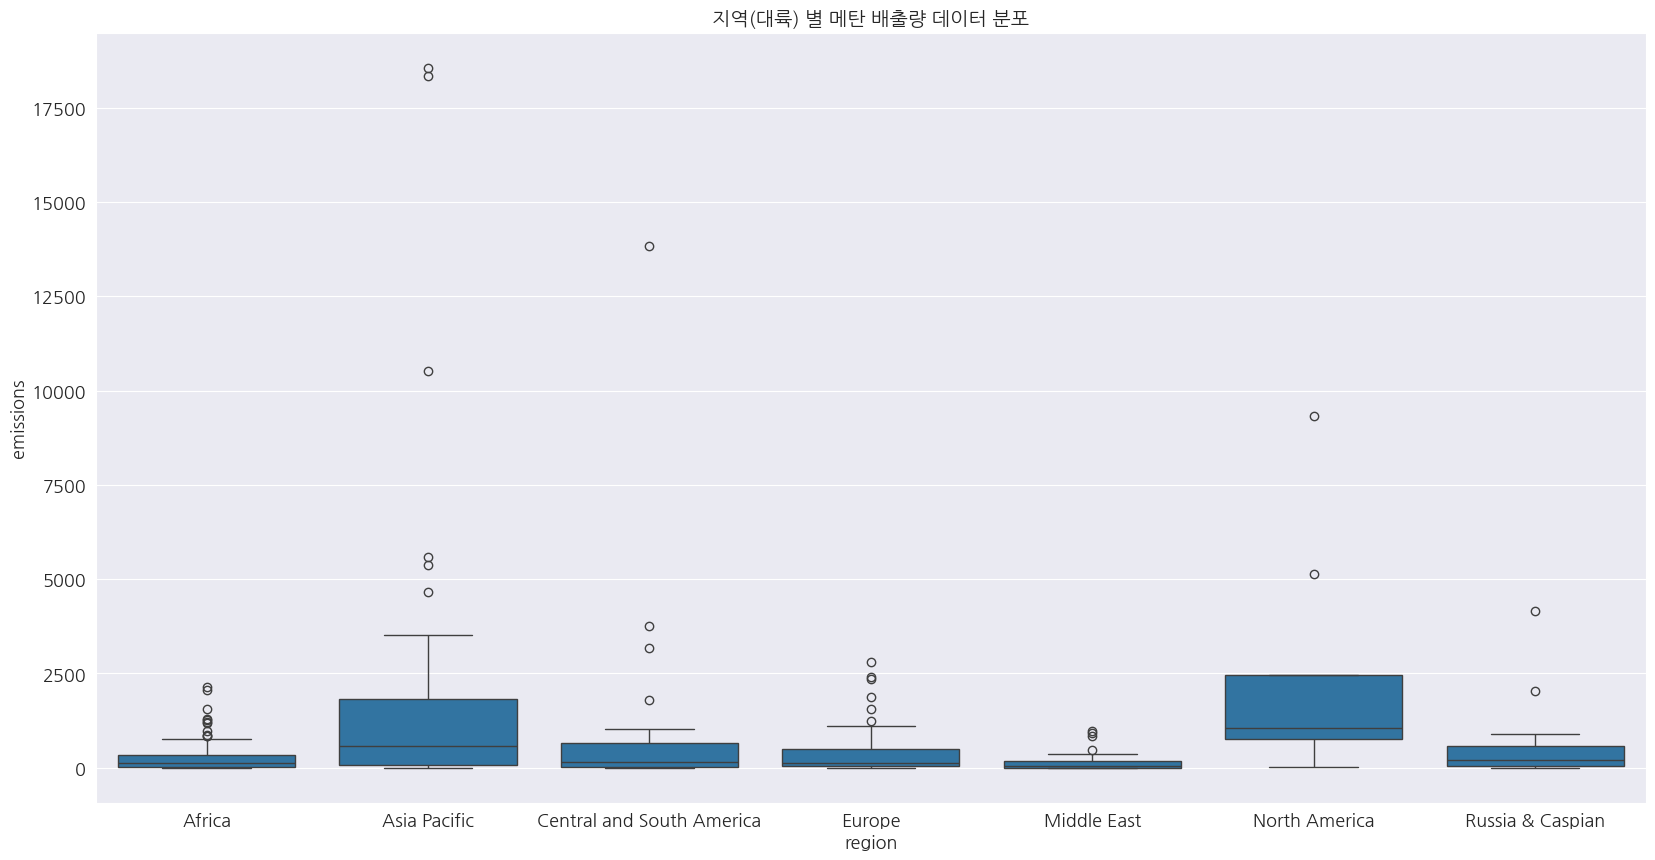

In [14]:
# boxplot : 지역(대륙) 별 메탄 배출량 이상치 등 데이터 분포 확인을 위함
plt.figure(figsize=(20, 10))
plt.rc("font", family="NanumGothic", size=13)
plt.rcParams["axes.unicode_minus"] = False
plt.title("지역(대륙) 별 메탄 배출량 데이터 분포", fontsize=14)
sns.boxplot(result_df, x="region", y="emissions")
plt.show()

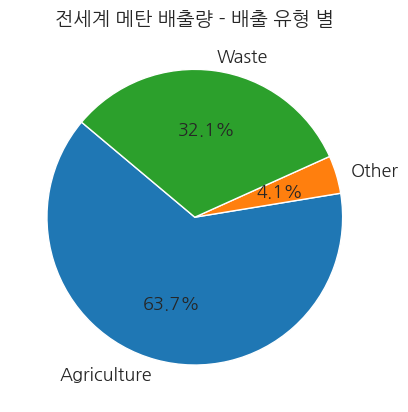

In [15]:
pivot_data = mt2019.pivot_table(index=["region", "type"], values="emissions")


# pieplot : 배출 유형 별 전세계 메탄 배출량 비율 확인을 위함
def get_pie(str="World"):
    region_data = pivot_data.loc[(str)]
    plt.rc("font", family="NanumGothic", size=13)
    plt.rcParams["axes.unicode_minus"] = False
    plt.title("전세계 메탄 배출량 - 배출 유형 별", fontsize=14)
    plt.pie(
        region_data["emissions"],
        labels=region_data.index,
        autopct="%1.1f%%",
        startangle=140,
    )
    plt.show()


get_pie()

In [16]:
filtered_df = filtered_df[1:]
filtered_df  # 반환 값 -> 시리즈

region
Asia Pacific                 63285
Central and South America    23433
Africa                       15658
North America                12830
Europe                       12367
Other                         7269
Russia & Caspian              4196
Middle East                   1605
Name: emissions, dtype: int64

In [17]:
# 시리즈를 데이터프레임으로 변경
filtered_df = filtered_df.reset_index()
filtered_df.columns = ["region", "emissions"]

<Axes: xlabel='emissions', ylabel='region'>

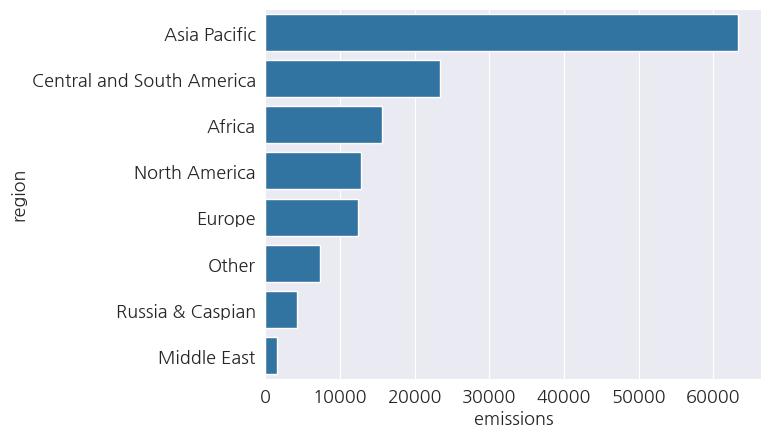

In [18]:
# barplot : 지역(대륙) 별 메탄 배출량 총 합 비교
sns.barplot(
    filtered_df,
    x="emissions",
    y="region",
)

<Axes: xlabel='emissions', ylabel='country'>

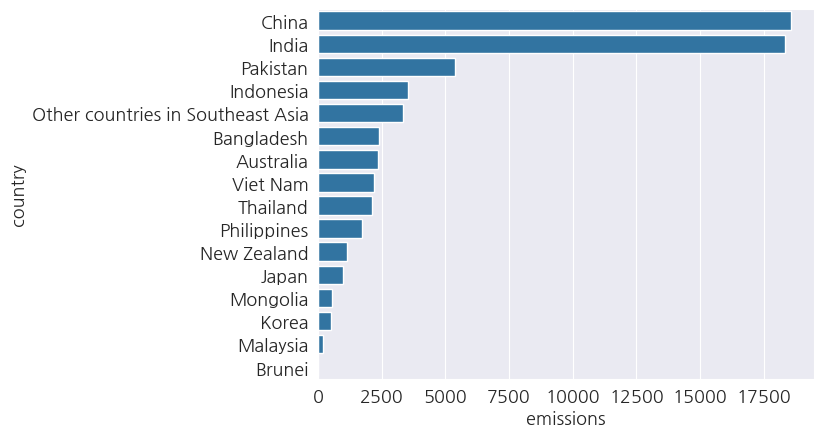

In [19]:
# barplot : 메탄의 배출 유형이 농업이고, 배출 지역이 아시아-태평양인 국가들의 메탄 배출량을 내림차순으로 확인하기 위함
filtered_rg_df = filtered_rg_df.reset_index()
filtered_rg_df.columns = ["country", "emissions"]
sns.barplot(
    filtered_rg_df,
    x="emissions",
    y="country",
)

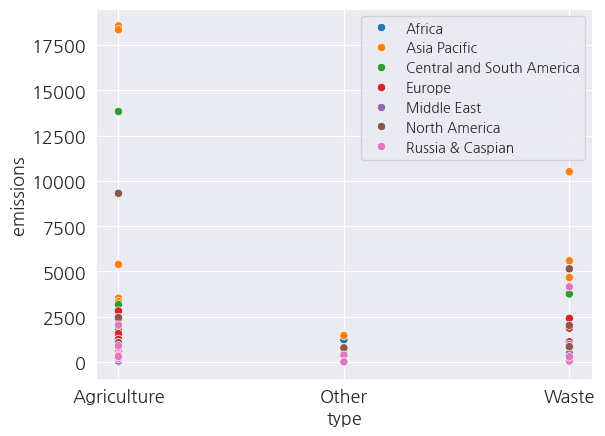

In [20]:
# scatterplot : 배출 유형 별 데이터 분포 확인을 위함
sns.scatterplot(data=result_df, x="type", y="emissions", hue="region")
plt.legend(prop={"size": 10})
plt.show()

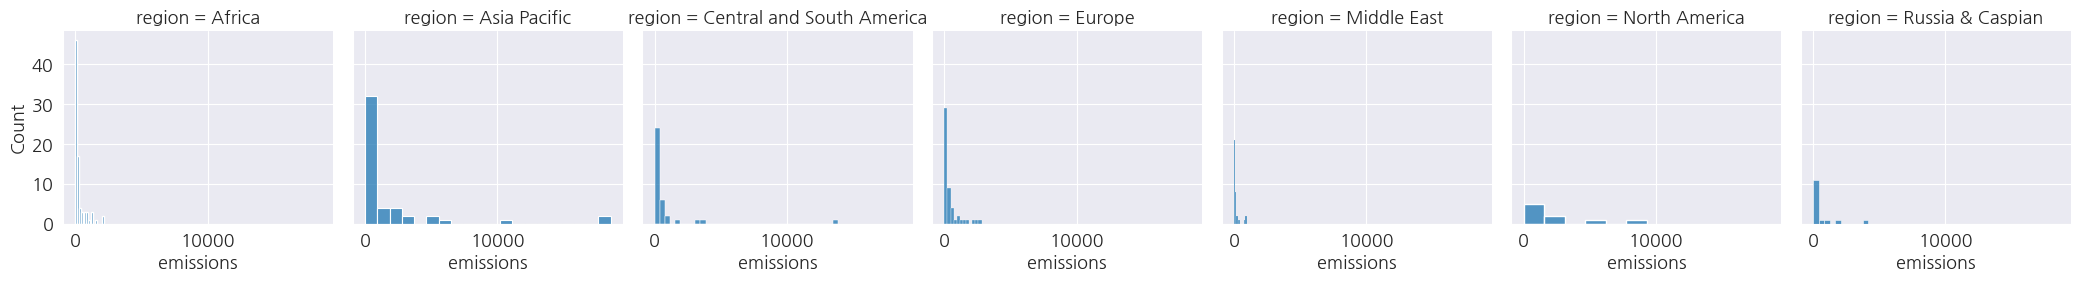

In [21]:
grid = sns.FacetGrid(
    data=result_df,
    col="region",
)
grid.map(sns.histplot, "emissions")
plt.show()

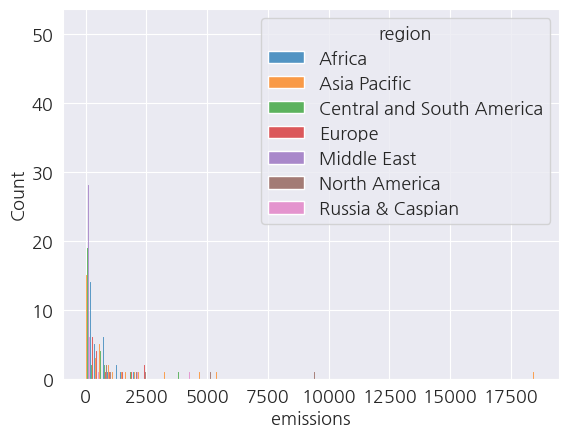

In [22]:
sns.histplot(
    data=result_df,
    x="emissions",
    hue="region",
    multiple="dodge",
)
plt.show()

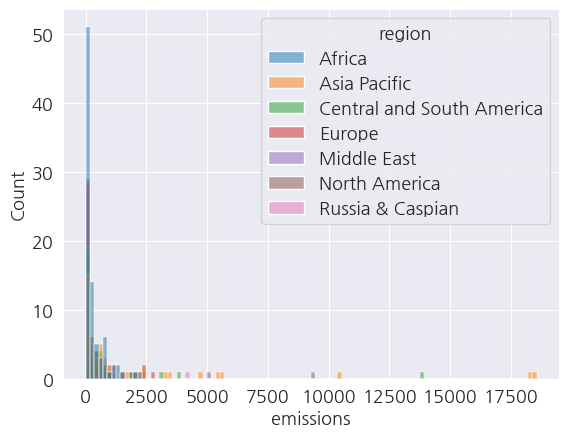

In [23]:
sns.histplot(
    data=result_df,
    x="emissions",
    hue="region",
    multiple="layer",
)
plt.show()

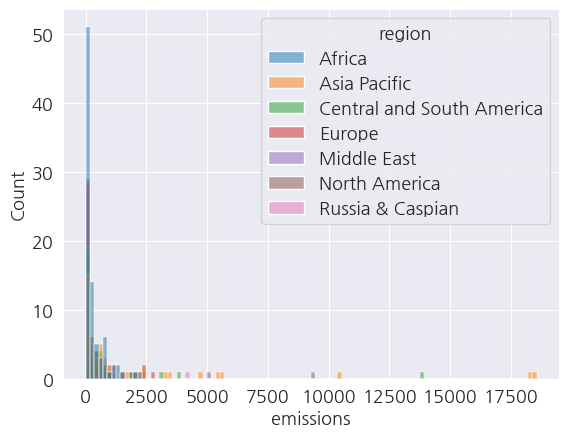

In [24]:
sns.histplot(
    data=result_df,
    x="emissions",
    hue="region",
    multiple="layer",
)
plt.show()